# Aim of the Project
The aim of the project is to build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.

# Background
The auto insurance industry is witnessing a paradigm shift. Since auto insurance company consists of homogenous good thereby making it difficult to differentiate product A from product B, also companies are fighting a price war (for insurance price). On top of that, the distribution channel is shifting more from traditional insurance brokers to online purchases, which means that the ability for companies to interact through human touchpoints is limited, and customers should be quoted at a reasonable price. A good price quote is one that makes the customer purchase the policy and helps the company to increase the profits.

Also, the insurance premium is calculated based on more than 50+ parameters, which means that traditional business analytics-based algorithms are now limited in their ability to differentiate among customers based on subtle parameters.

# Dataset Description
The project involves the use of a dataset with 600k training data and 57 features/data. In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target column signifies whether a claim was filed for that policy holder.


# Data Processing

In [1]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Capstone Project Dataset/dataset_auto insurance.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Capstone Project Dataset/dataset_auto insurance.zip
  inflating: train(1).csv            


In [3]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load dataset into a pandas dataframe
df = pd.read_csv('/content/train(1).csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


# Exploratory Data Analysis

**Data Insights**

In [5]:
#check number of rows and columns in the dataset
print(df.shape)

(595212, 59)


The dataset consists of 595212 rows and 59 columns. 1st column is ID, 2nd Column is target labels and remaining 57 columns are the features.

In [6]:
#print the headings in dataset
print(df.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


The column names indicate the groups ind, reg, car and calc. The suffixes cat and bin on each column name indicates the categorical and binary values. Column names without suffix would be Nominal or Ordinal data.

In [7]:
#check datatypes
print(df.dtypes)

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

All the features are either int64 or float64

**Missing Values**

In [8]:
#check missing values
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


There are no null values in the dataset. However, as per the Dataset description the missing values are indicated by -1.

In [9]:
#considering -1 as missing value, find the percentage of missing values
missing_df = pd.DataFrame({'column':df.columns, 'missing(%)':((df == -1).sum()/df.shape[0])*100}, index=None)
missing_df = (missing_df[missing_df['missing(%)']>0].sort_values(by=['missing(%)'], ascending=False))
missing_df

,column,missing(%)
ps_car_03_cat,ps_car_03_cat,69.089837
ps_car_05_cat,ps_car_05_cat,44.782531
ps_reg_03,ps_reg_03,18.106490
ps_car_14,ps_car_14,7.160474
ps_car_07_cat,ps_car_07_cat,1.930237
ps_ind_05_cat,ps_ind_05_cat,0.975955
ps_car_09_cat,ps_car_09_cat,0.095596
ps_ind_02_cat,ps_ind_02_cat,0.036290
ps_car_01_cat,ps_car_01_cat,0.017977
ps_ind_04_cat,ps_ind_04_cat,0.013945


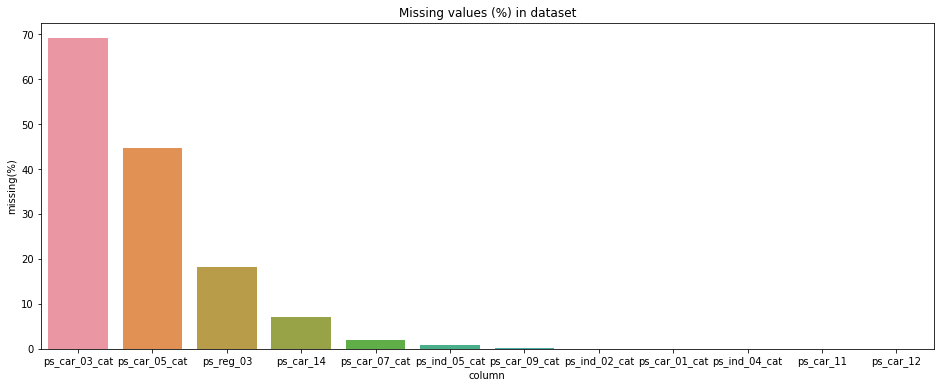

In [ ]:
#visualize the missing value %
plt.figure(figsize=(16,6))
sns.barplot(data= missing_df.nlargest(12, 'missing(%)'), x='column', y='missing(%)')
plt.title('Missing values (%) in dataset')
plt.show()

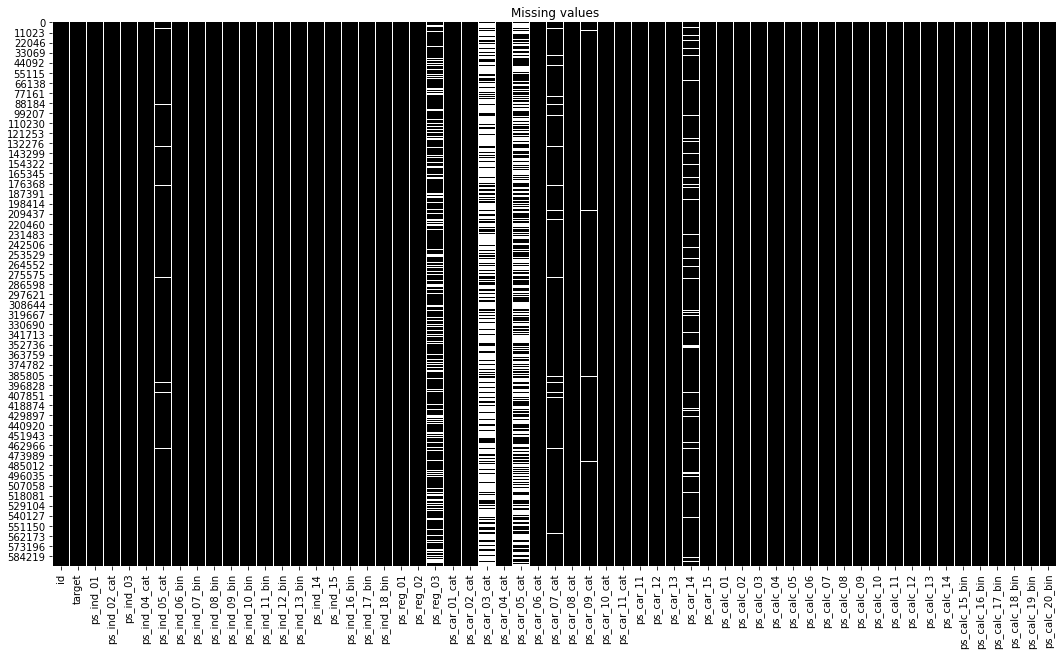

In [ ]:
#heatmap to see the frequency of missing values in each feature
plt.figure(figsize=(18,10))
sns.heatmap(df==-1, cmap='gray', cbar=False)
plt.title('Missing values')
plt.show()

There are missing values in 12 columns, out of which missing values in 8 columns is < 5%. We can drop the rows with missing values in these columns. However, to avoid loosing the target label data, will impute these values as well.

Will drop the columns 'ps_car_03_cat' and 'ps_car_05_cat' due to high missing values.

We need to treat the missing values in 2 columns 'ps_reg_03' and 'ps_car_14' replacing with median value.

In [10]:
#treating missing values
drop_cols = ['ps_car_03_cat', 'ps_car_05_cat']
impute_cols = ['ps_reg_03', 'ps_car_14', 'ps_car_07_cat', 'ps_ind_05_cat', 'ps_car_09_cat', 'ps_ind_02_cat', 'ps_car_01_cat', 
               'ps_ind_04_cat', 'ps_car_11', 'ps_car_12']

#drop columns with high missing values
df_mvt = df.drop(drop_cols, axis=1)


In [11]:
#impute missing values
for col in impute_cols:
  df_mvt[col].replace(-1, df_mvt[col].median(), inplace=True)


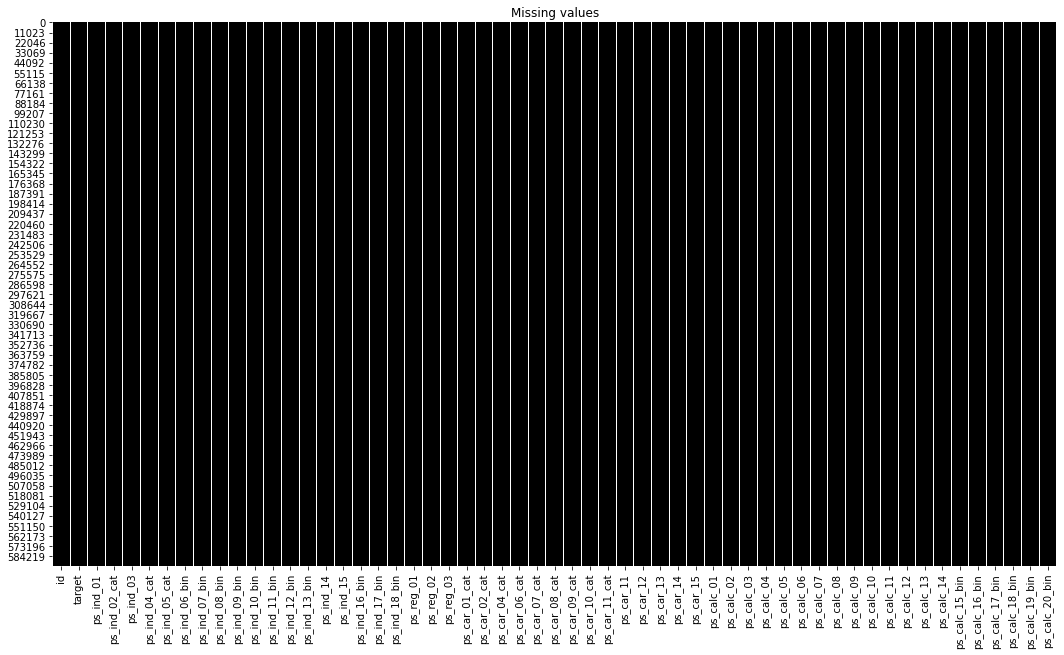

In [ ]:
#check heatmap after missing value treatement
plt.figure(figsize=(18,10))
sns.heatmap(df_mvt==-1, cmap='gray', cbar=False)
plt.title('Missing values')
plt.show()

In [12]:
#dataset shape after missing value treatement
df_mvt.shape

(595212, 57)

**Target Labels**

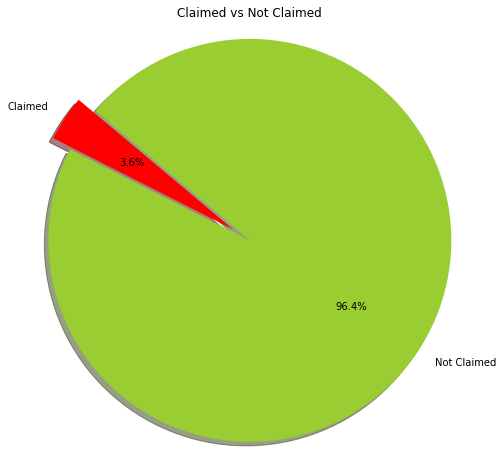

In [ ]:
#visualizing the target labels
plt.figure(figsize=(8,8))
plt.title('Claimed vs Not Claimed')
objects = ('Claimed', 'Not Claimed')
colors = ['red', 'yellowgreen']
sizes = [(df_mvt['target'].sum()*100.0)/df_mvt.shape[0], ((df_mvt.shape[0] - df_mvt['target'].sum())*100.0)/df_mvt.shape[0]]
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

We can see that the labels are binary, where 0 indicates no-claim and 1 indicates claim. The target variables are not distributed equally i.e. the data is not balanced. 

3.6% of the people claimed insurance and 96.4% did not claim insurance.

**Feature Analysis**

**Binary Features**

No of Binary Features: 17


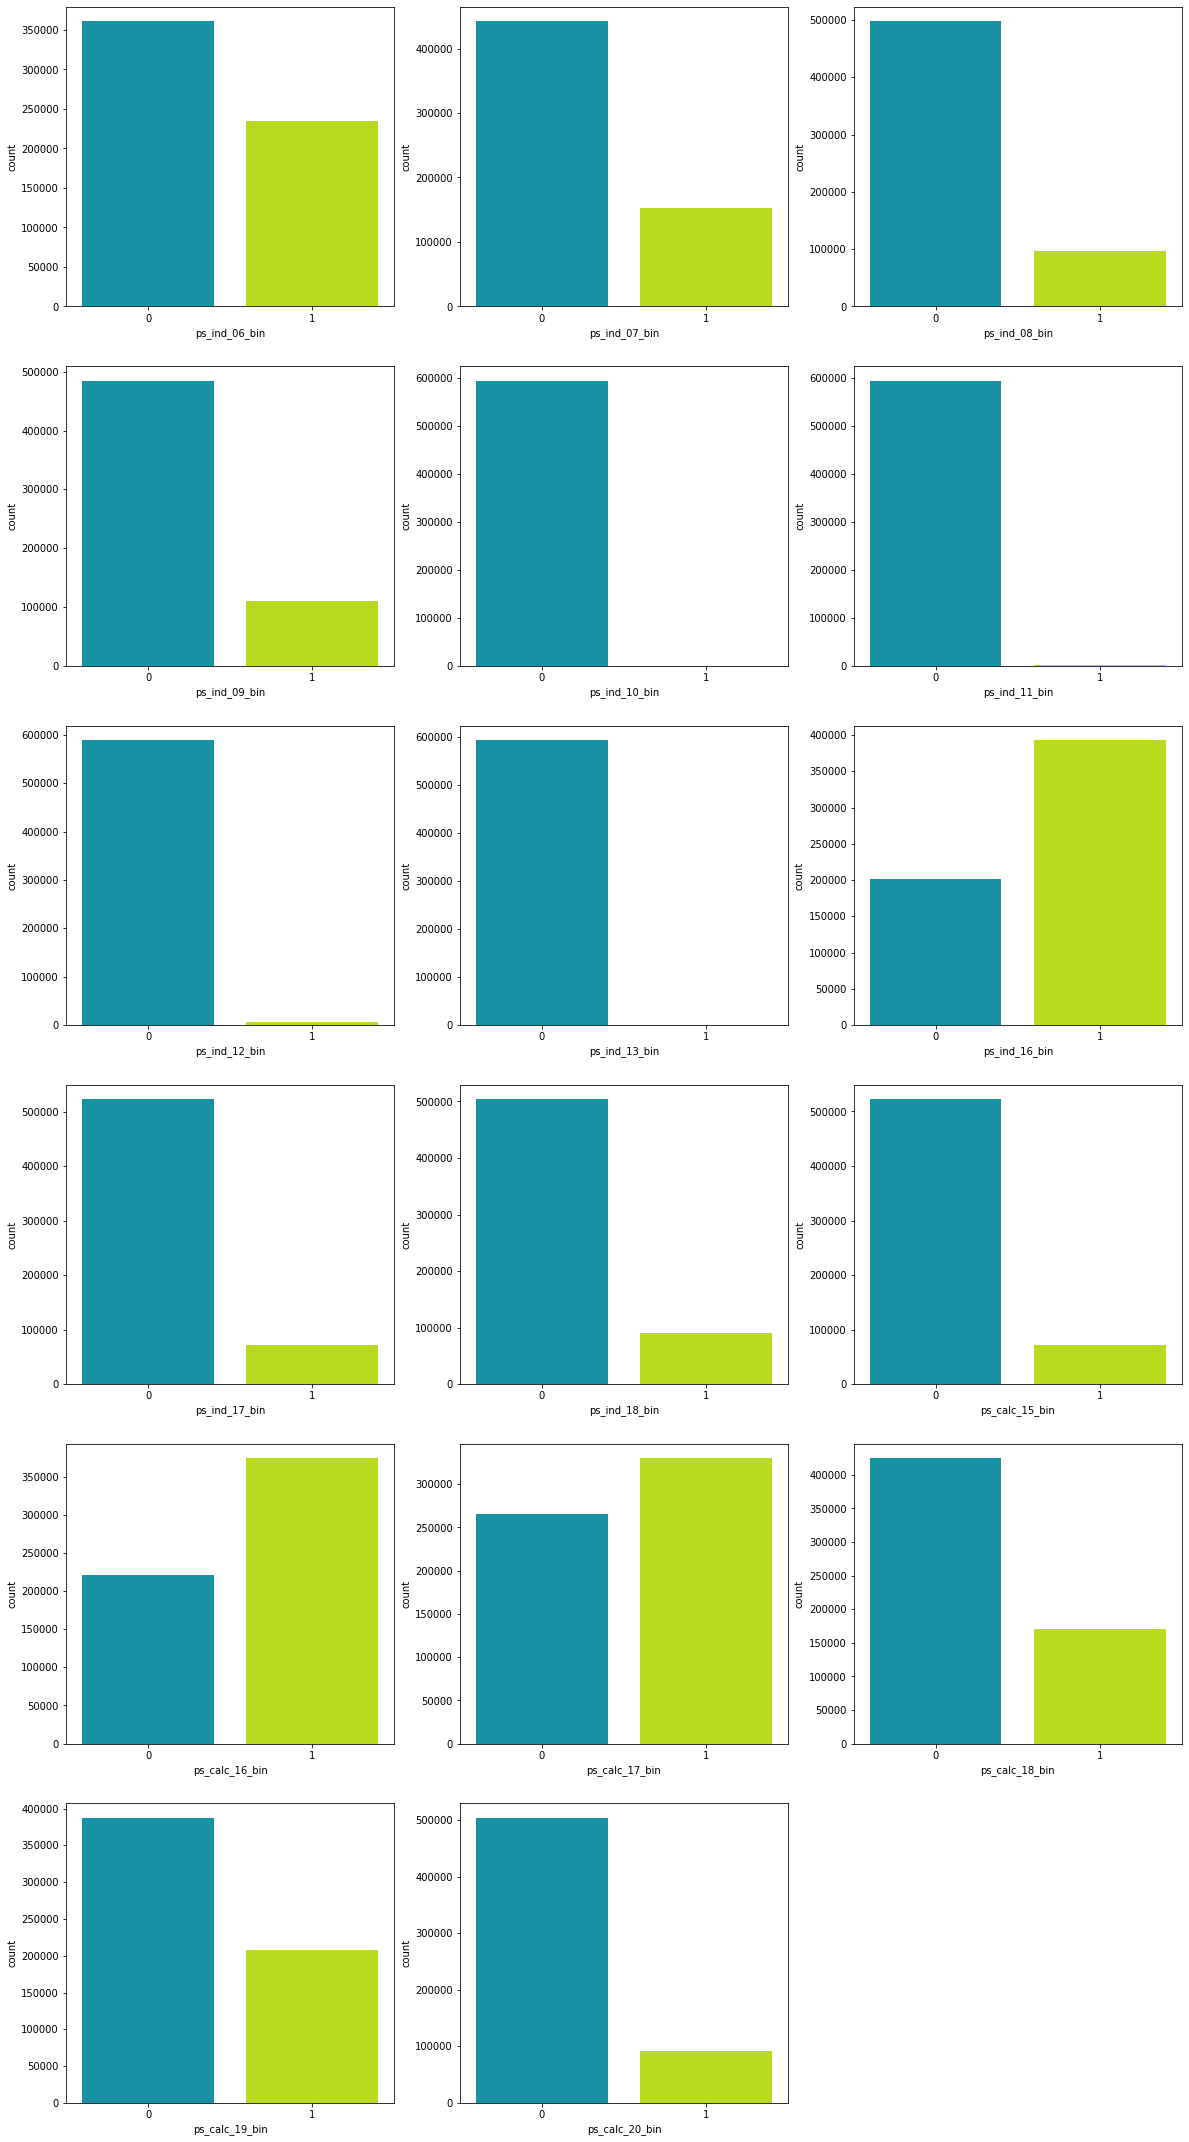

In [ ]:
features = df_mvt.columns.tolist() #appending all features from df to a list
bin_features = [col for col in features if 'bin' in col] #filtering the features with 'bin' in name and creating a list of such features
df_bin_features = pd.DataFrame({'Binary Features':bin_features})

print('No of Binary Features:', len(bin_features))

#visualization with bar plot
n_row = len(bin_features)
n_col = 3   
n_sub = 1      
fig = plt.figure(figsize=(20,30))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(bin_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_mvt[bin_features[i]],palette='nipy_spectral')
    n_sub+=1   
plt.show()

* There are 17 Binary features
* 'ps_ind_10_bin' and 'ps_ind_11_bin', 'ps_ind_12_bin' and 'ps_ind_13_bin' are almost always 0.
* The 0s are comparatively high in 'ps_ind_6_bin', 'ps_ind_7_bin', 'ps_ind_8_bin', 'ps_ind_9_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', and 'ps_calc_20_bin'.


**Categorical Features**

No of Categorical Features: 12


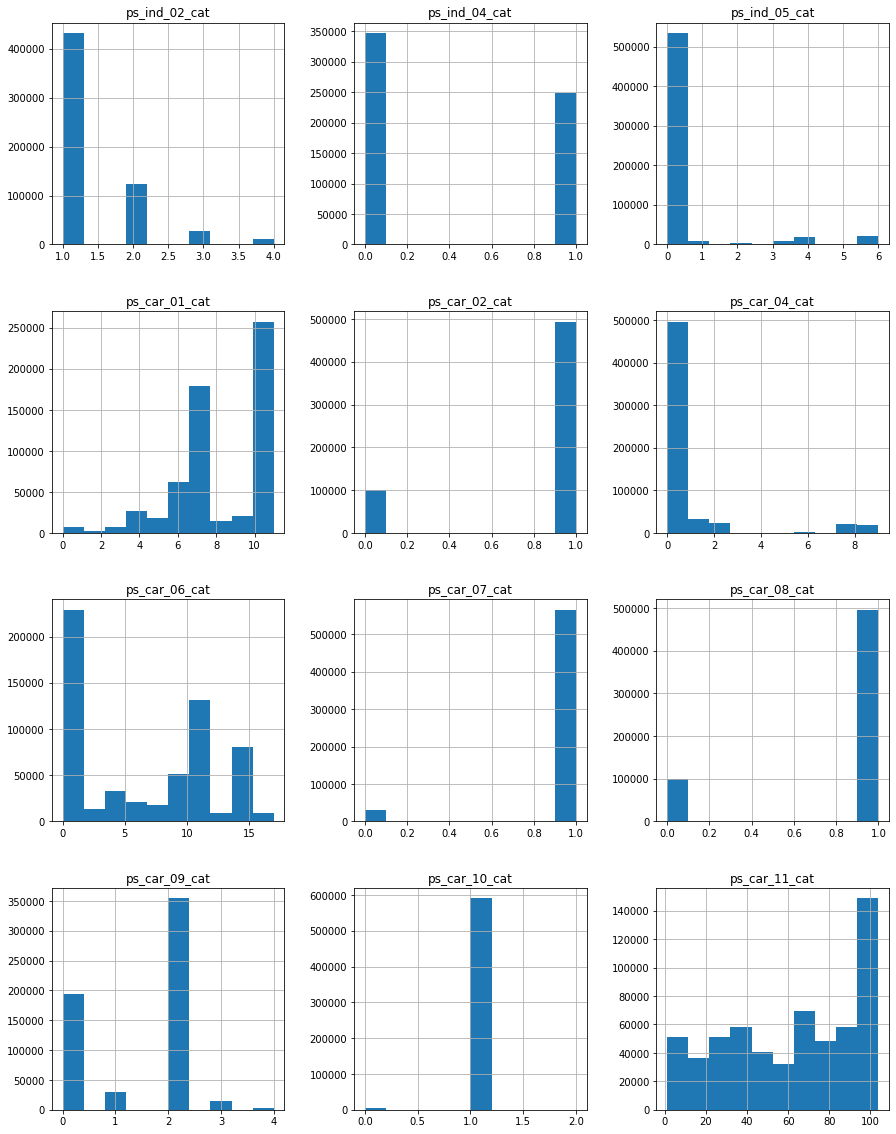

In [ ]:
cat_features = [col for col in features if 'cat' in col] #filtering the features with 'cat' in name and creating a list of such features
df_cat_features = pd.DataFrame({'Categorical Features':cat_features})

print('No of Categorical Features:', len(cat_features))

#visualization with histogram
plt.rcParams['figure.figsize'] = (15,20)
df_mvt.hist(column=cat_features) 
plt.show()

* There are 14 categorical features in the dataset and 12 remaining after missing value treatement

* 'ps_car_11' has too many categories (104).

* 'ps_ind_04_cat', 'ps_car_02_cat, 'ps_car_07_cat', and 'ps_car_08_cat' have exactly two categories, but it is not named binary. The reason can be that this variable can take more than two categories but there are no examples in this dataset.

* 'ps_ind_05_cat and 'ps_car_04_cat' have the most frequnency in their 0 category.

* 'ps_car_10_cat' is almost always 1.

**Ordinal Features**

No of Ordinal Features: 16


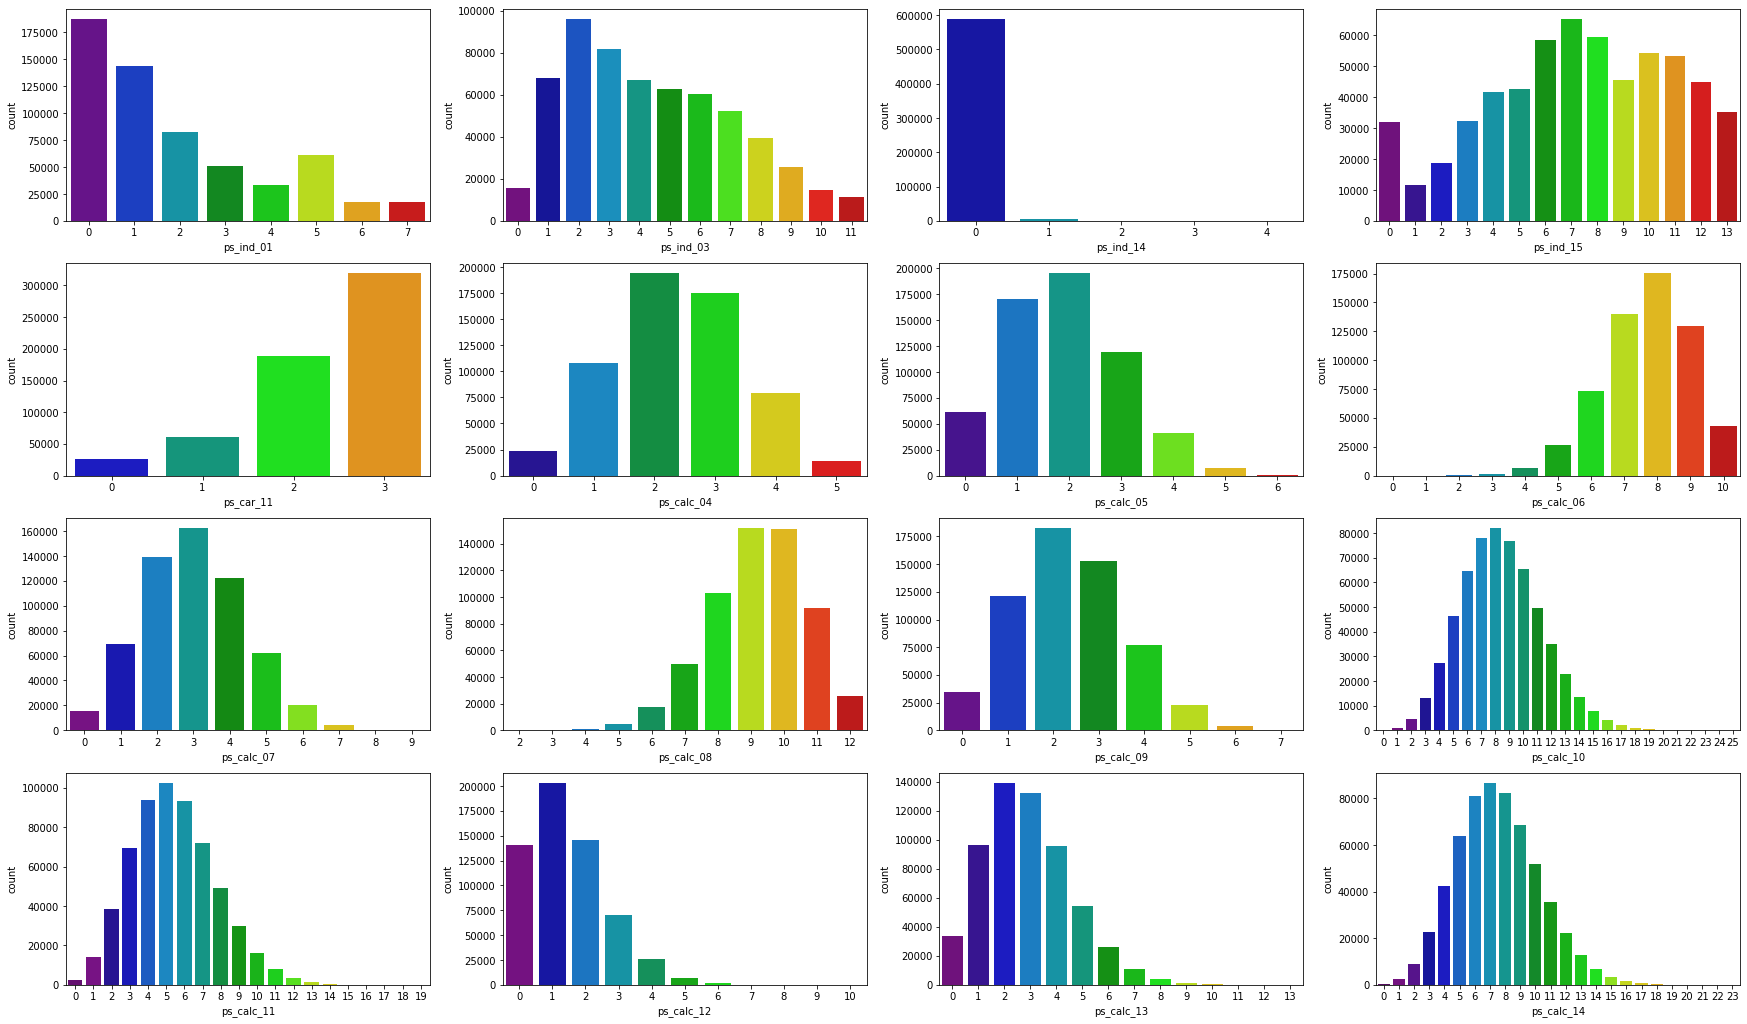

In [ ]:
int_features = df_mvt.select_dtypes(include=['int64']).columns.tolist() #selecting the 'int64' formatted features from dataset to a list

#finding the ordinal features by excluding categorical, binary, id and target columns
ordinal_features = [o for o in int_features if ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = pd.DataFrame({'Ordinal features': ordinal_features})

print('No of Ordinal Features:', len(ordinal_features))

#visualizing with bar plots
n_row = len(ordinal_features)
n_col = 4   
n_sub = 1      
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(ordinal_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_mvt[ordinal_features[i]],palette='nipy_spectral')
    n_sub+=1   
plt.show()

* There are 16 Ordinal features

* 'ps_ind_14' has almost 0s

* Many of the ordinal features have more than 7 categories with some over 25

**Continuous/Interval Features**

We will visualize the continuous features with dist plots.

No. of Continuous Features: 10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


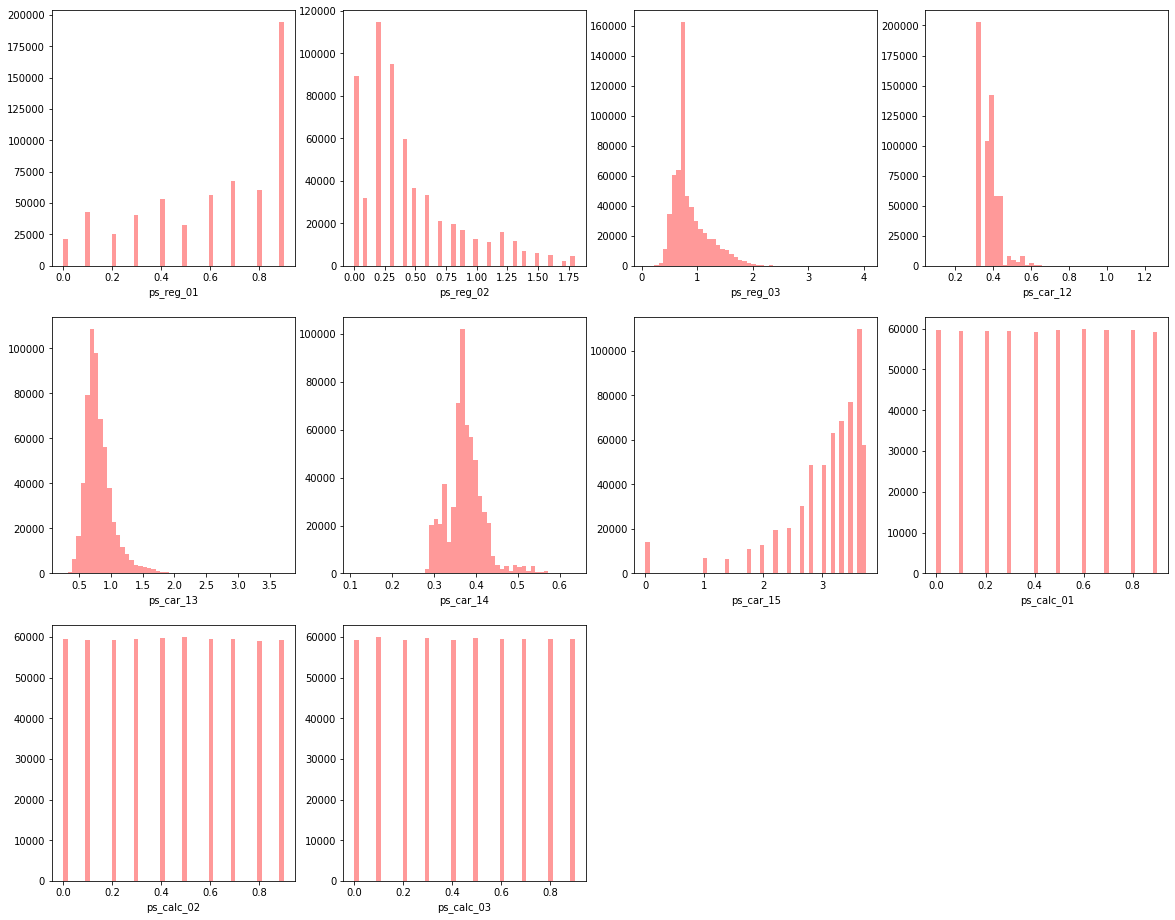

In [ ]:
cont_features = df_mvt.select_dtypes(include=['float64']).columns.tolist()
cont_features_df = pd.DataFrame({'Numerical Continuous features': cont_features})
'''cont_features.remove('ps_calc_01')
cont_features.remove('ps_calc_02')
cont_features.remove('ps_calc_03')'''

print('No. of Continuous Features:', len(cont_features))

n_row = len(cont_features)
n_col = 4   
n_sub = 1      
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(bottom=-0.8,top=2)
for i in range(len(cont_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(df_mvt[cont_features[i]], kde=False,color='Red')
    n_sub+=1   
plt.show()

* The values in 'ps_calc_01', 'ps_calc_02' and 'ps_calc_03' are equally distributed and are in between 0 and 1.

* 'ps_reg_02' is right skewed

* 'ps_car_15' is left skewed

**Correlation**

**Correlation among Ordinal Features**

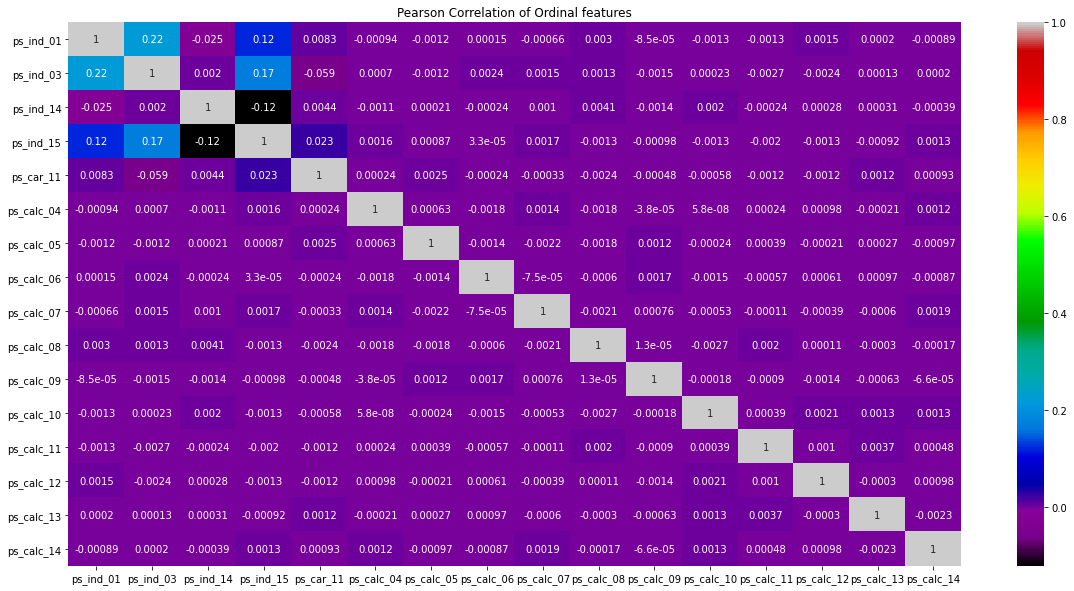

In [ ]:
a = df_mvt[ordinal_features]
plt.figure(figsize=(20,10))
sns.heatmap(a.corr(), annot=True,cmap='nipy_spectral')
plt.title('Pearson Correlation of Ordinal features')
plt.show()

**Moderate Correlation between:**
* 'ps_ind_01' and 'ps_ind_03'

* 'ps_ind_01' and 'ps_ind_15'

* 'ps_ind_03' and 'ps_ind_15'

**Correlation among Continuous Features**

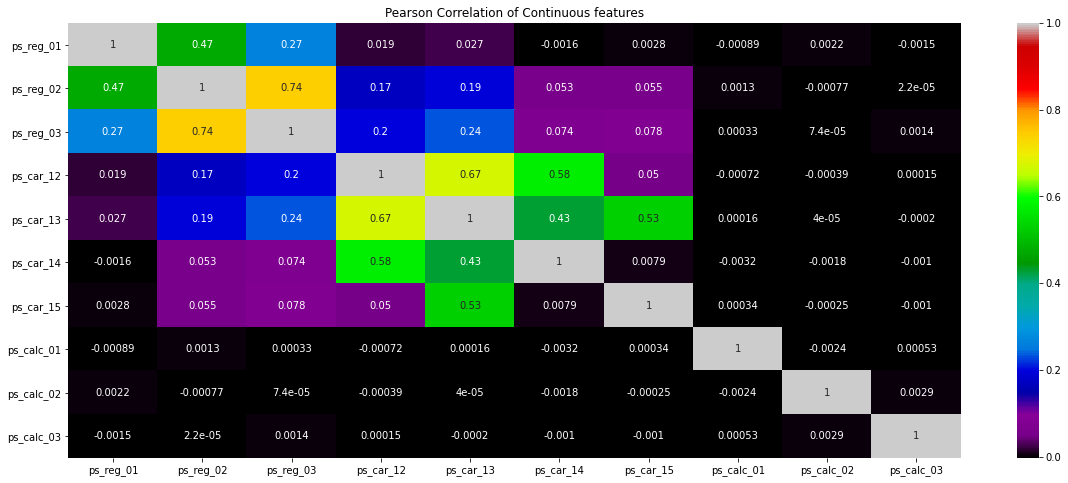

In [ ]:
c = df_mvt[cont_features]
plt.figure(figsize=(20,8))
sns.heatmap(c.corr(), annot=True,cmap='nipy_spectral')
plt.title('Pearson Correlation of Continuous features')
plt.show()

**High Correlation between:**

* 'ps_reg_01' and 'ps_reg_02'

* 'ps_reg_03' and 'ps_reg_02'

* 'ps_car_12' and 'ps_car_14'

* 'ps_car_12' and 'ps_car_13'

* 'ps_car_13' and 'ps_car_15'

* 'ps_car_13' and 'ps_car_14'

**Moderate Correlation between:**

* 'ps_reg_01' and 'ps_car_03'

* 'ps_reg_02' and 'ps_car_13'

* 'ps_reg_02' and 'ps_car_12'

* 'ps_reg_03' and 'ps_car_13'

* 'ps_reg_03' and 'ps_car_12'

**Splitting the data**

Will separate the features and labels for further processing.

In [13]:
x = df_mvt.drop(['id', 'target'], axis=1)

y = df_mvt['target']

print(x.shape, y.shape)

(595212, 55) (595212,)


In [14]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(476169, 55) (119043, 55) (476169,) (119043,)


# Feature Engineering

**Dimensionality Reduction**

Based on the correlation matrix we found high correlation between some features. We can drop one of the 2 highly correlated features for dimensionality reduction. Later we can apply PCA for further reduction.

We will drop the features 'ps_reg_02', 'ps_car_12' and 'ps_car_13'

In [15]:
x_train = x_train.drop(['ps_reg_02', 'ps_car_12', 'ps_car_13'], axis=1)
x_test = x_test.drop(['ps_reg_02', 'ps_car_12', 'ps_car_13'], axis=1)
print(x_train.shape, x_test.shape)

(476169, 52) (119043, 52)


In [16]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
x_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,1,5,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0.9,0.728011,7,1,0,14,1,1,2,1,42,2,0.393700,3.316625,0.8,0.8,0.6,3,3,8,3,10,3,8,4,4,3,11,0,0,1,0,1,0
1,0,1,7,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.0,0.837780,11,0,0,1,1,0,2,1,51,2,0.436348,3.741657,0.8,0.6,0.6,1,2,6,4,11,4,18,8,1,3,6,0,1,0,1,0,0
2,0,1,3,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.3,0.720677,11,1,0,9,1,1,2,1,21,3,0.313050,3.605551,0.0,0.1,0.9,0,1,9,6,10,3,11,5,2,3,10,0,0,0,0,0,0
3,0,3,4,0,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.9,0.692369,5,1,0,11,0,1,2,1,103,3,0.288791,3.605551,0.9,0.5,0.6,3,0,7,2,9,3,13,2,3,1,10,0,1,0,0,0,0
4,0,1,2,1,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.4,0.427931,7,1,0,11,1,1,0,1,11,2,0.368782,3.605551,0.2,0.8,0.9,4,1,6,3,8,2,11,8,3,6,11,0,0,0,0,1,1


**Scaling**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

No of Numerical Features: 23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


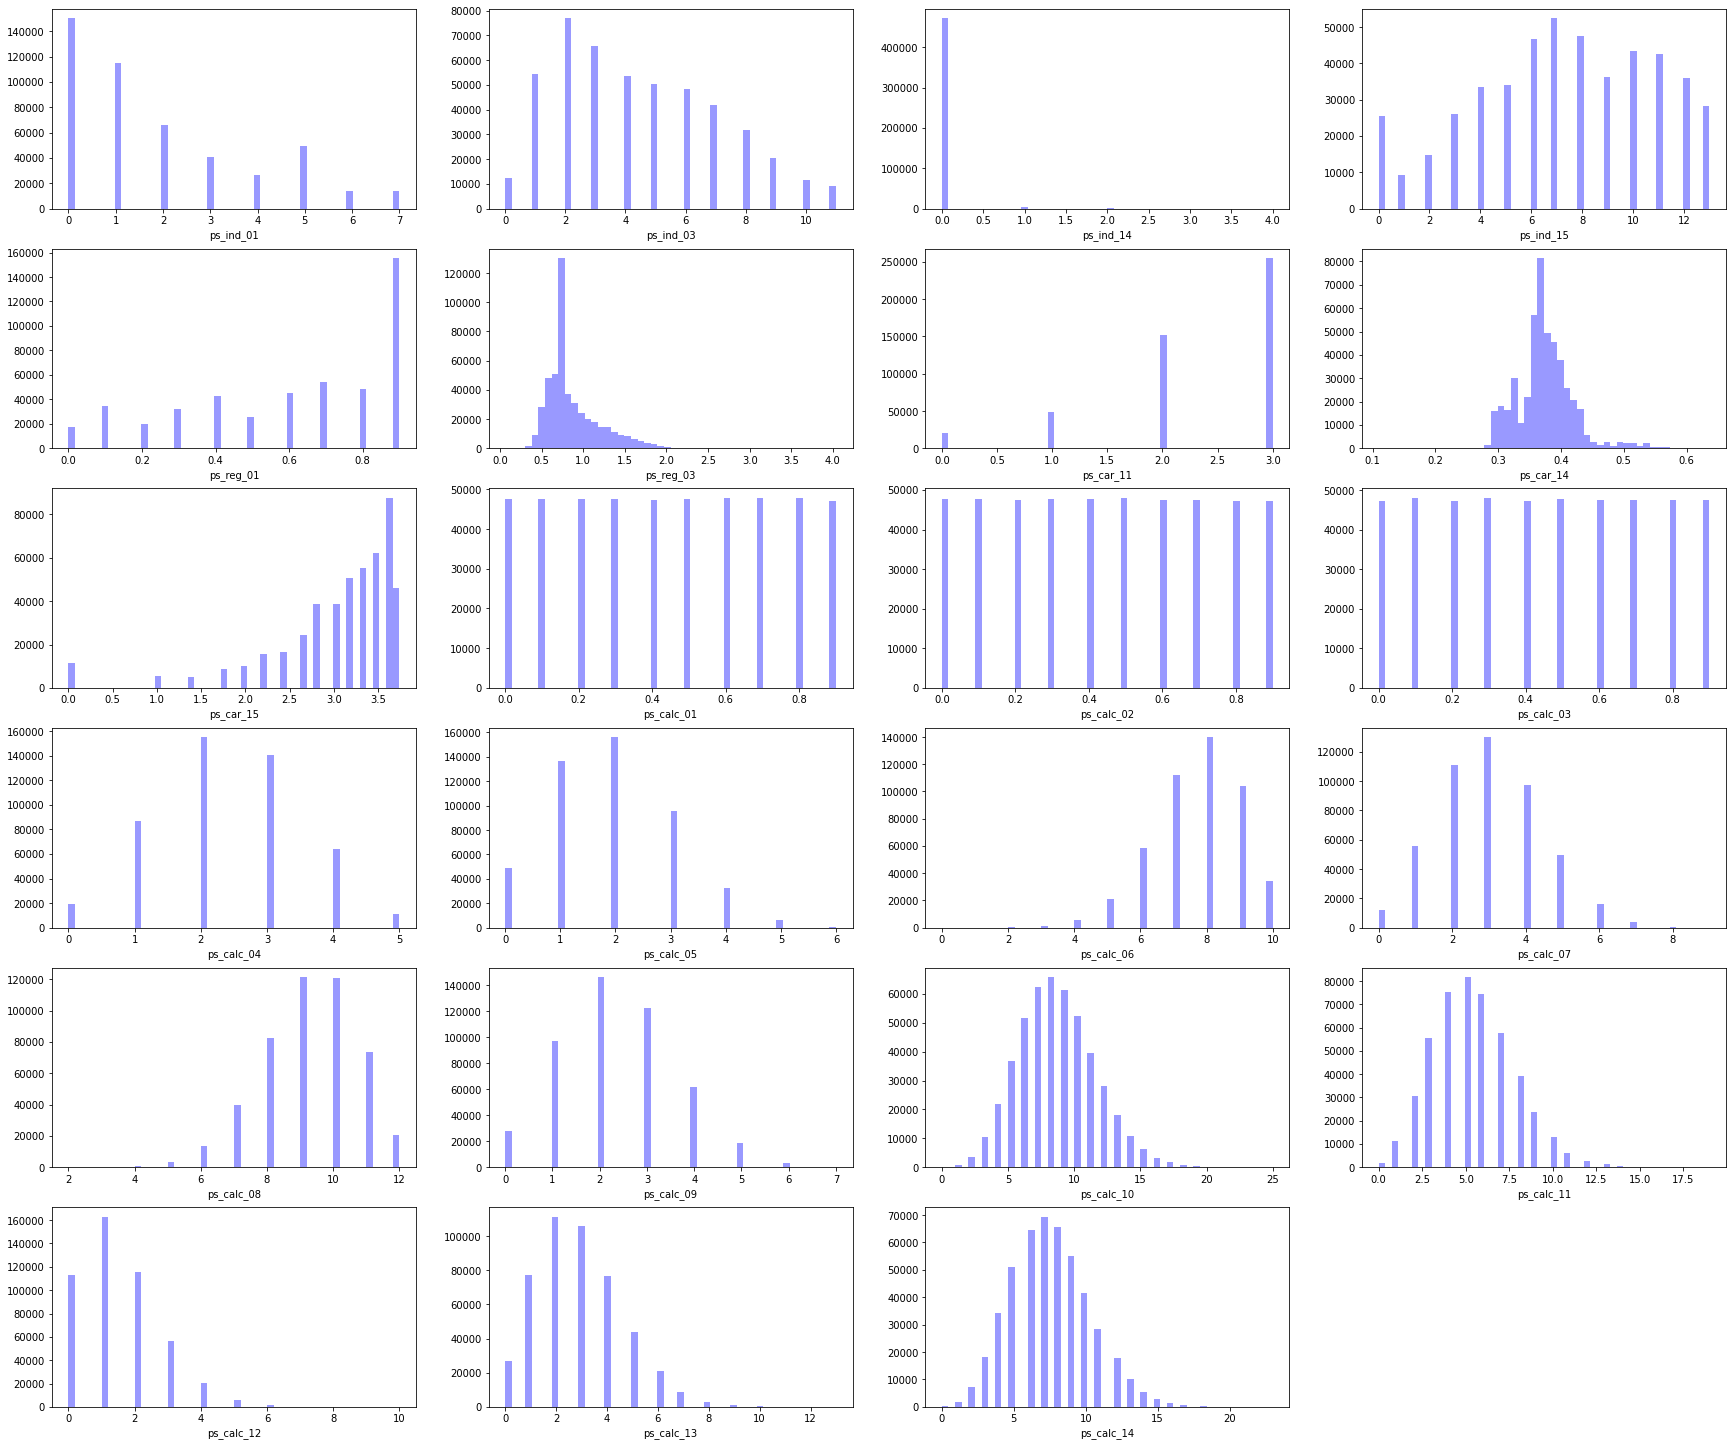

In [ ]:
#visualize the numerical features to decide on the scaling strategy
x_features = x_train.columns.tolist()

#finding the numerical features by excluding categorical and binary features
num_features = [n for n in x_features if ('cat' not in n and 'bin' not in n )]

print('No of Numerical Features:', len(num_features))

#visualizing the distribution
n_row = len(num_features)
n_col = 4   
n_sub = 1      
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(bottom=-0.8,top=3)
for i in range(len(num_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(x_train[num_features[i]], kde=False, color='Blue')
    n_sub+=1   
plt.show()

In [ ]:
#As we are not aware of what each feature indicates, we will scale the below listed features with StandardScaler. Will be scaling 2 categorical features as well which have more than 15 categories
features_std = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_03', 'ps_car_11', 'ps_car_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_car_11_cat', 'ps_car_06_cat']

In [ ]:
#applying StandardScaler by fitting on training set and transform on training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[features_std])
x_train_scaled = pd.DataFrame(scaler.transform(x_train[features_std]), columns=features_std)
x_test_scaled = pd.DataFrame(scaler.transform(x_test[features_std]), columns=features_std)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(476169, 21)
(119043, 21)


In [ ]:
#replacing the features in x with scaled data
x_train = x_train.drop(features_std, axis=1)
x_train = x_train.join(x_train_scaled)

x_test = x_test.drop(features_std, axis=1)
x_test = x_test.join(x_test_scaled)

print(x_train.shape, x_test.shape)

x_train.head()


(476169, 52) (119043, 52)


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_15,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat,ps_car_06_cat
0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,7,1,0,1,1,2,1,0.393700,0.8,0.8,0.6,0,0,1,0,1,0,0.049891,0.213306,-0.096938,-1.494337,1.005254,-0.421827,-0.415527,0.343323,0.562088,0.980955,0.231458,-0.003781,0.530292,0.530795,-0.149089,-0.617622,2.126826,0.075533,1.260116,-0.612518,1.353907
1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,11,0,0,1,0,2,1,0.436348,0.8,0.6,0.6,0,1,0,1,0,0,-0.958051,0.953862,-0.096938,0.197676,-2.125384,-0.078169,-0.415527,0.923985,-1.227475,0.100436,-1.266765,0.703061,1.215447,1.332595,3.294066,1.096935,-0.367428,0.075533,-0.560842,-0.339838,-1.009605
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,11,1,0,1,1,2,1,0.313050,0.0,0.1,0.9,0,0,0,0,0,0,-0.958051,-0.527249,-0.096938,0.197676,-1.081838,-0.444789,0.785472,0.738043,-2.122256,-0.780083,0.980569,2.116745,0.530292,0.530795,0.883857,-0.188983,0.463990,0.075533,0.895925,-1.248771,0.444864
3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,5,1,0,0,1,2,1,0.288791,0.9,0.5,0.6,0,1,0,0,0,0,-0.958051,-0.156972,-0.096938,1.043683,1.005254,-0.533413,0.785472,0.738043,0.562088,-1.660602,-0.517653,-0.710623,-0.154864,0.530795,1.572488,-1.474901,1.295408,-1.104534,0.895925,1.235648,0.808481
4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,7,1,0,1,1,0,1,0.368782,0.2,0.8,0.9,0,0,0,0,1,1,-0.958051,-0.897527,-0.096938,0.761681,-0.733989,-1.361300,-0.415527,0.738043,1.456869,-0.780083,-1.266765,-0.003781,-0.840019,-0.271005,0.883857,1.096935,1.295408,1.845635,1.260116,-1.551749,0.808481


In [ ]:
x_test.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_15,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat,ps_car_06_cat
0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,10,1,0,1,1,0,1,0.373497,0.0,0.3,0.2,0,1,0,1,0,0,1.057833,0.213306,-0.096938,0.197676,0.309557,1.583045,0.785472,-2.255672,2.351650,-1.660602,0.231458,-0.003781,-0.154864,0.530795,-0.493405,0.668296,1.295408,-0.514500,-1.653417,-1.400260,0.808481
1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,10,0,0,1,1,0,1,0.446094,0.3,0.8,0.3,0,1,1,0,0,0,2.065775,2.064695,-0.096938,-0.648331,1.005254,2.929401,-1.616526,0.132461,-1.227475,-0.780083,0.231458,0.703061,-0.840019,1.332595,0.195226,0.239657,1.295408,0.075533,-0.925034,1.265945,-0.282370
2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,11,1,0,1,1,1,1,0.368782,0.2,0.6,0.3,0,0,1,0,0,0,1.057833,1.694417,-0.096938,0.761681,-1.777535,-0.444789,0.785472,-2.821553,2.351650,-0.780083,0.231458,-0.710623,-0.840019,-0.271005,1.228173,-1.046261,-0.367428,-1.694568,-0.196650,-0.945793,-1.009605
3,1,1,4,0,1,0,0,0,0,0,0,0,0,1,11,1,0,1,0,2,1,0.298329,0.4,0.8,0.1,1,1,0,0,0,0,-0.958051,0.953862,-0.096938,-1.212335,1.005254,0.019283,0.785472,0.738043,0.562088,0.100436,-0.517653,0.703061,0.530292,-0.271005,-1.182036,-1.903540,-0.367428,0.075533,-0.560842,1.053861,1.535715
4,1,1,0,1,0,0,0,0,0,0,0,0,1,0,11,1,0,1,1,2,1,0.359861,0.0,0.8,0.9,0,1,0,0,0,0,-0.454080,-0.527249,-0.096938,1.325685,-0.038292,-0.379221,0.785472,0.544800,0.562088,0.100436,1.729680,-0.003781,1.215447,0.530795,0.539542,0.239657,-0.367428,1.255601,-0.560842,-0.733709,-1.009605


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


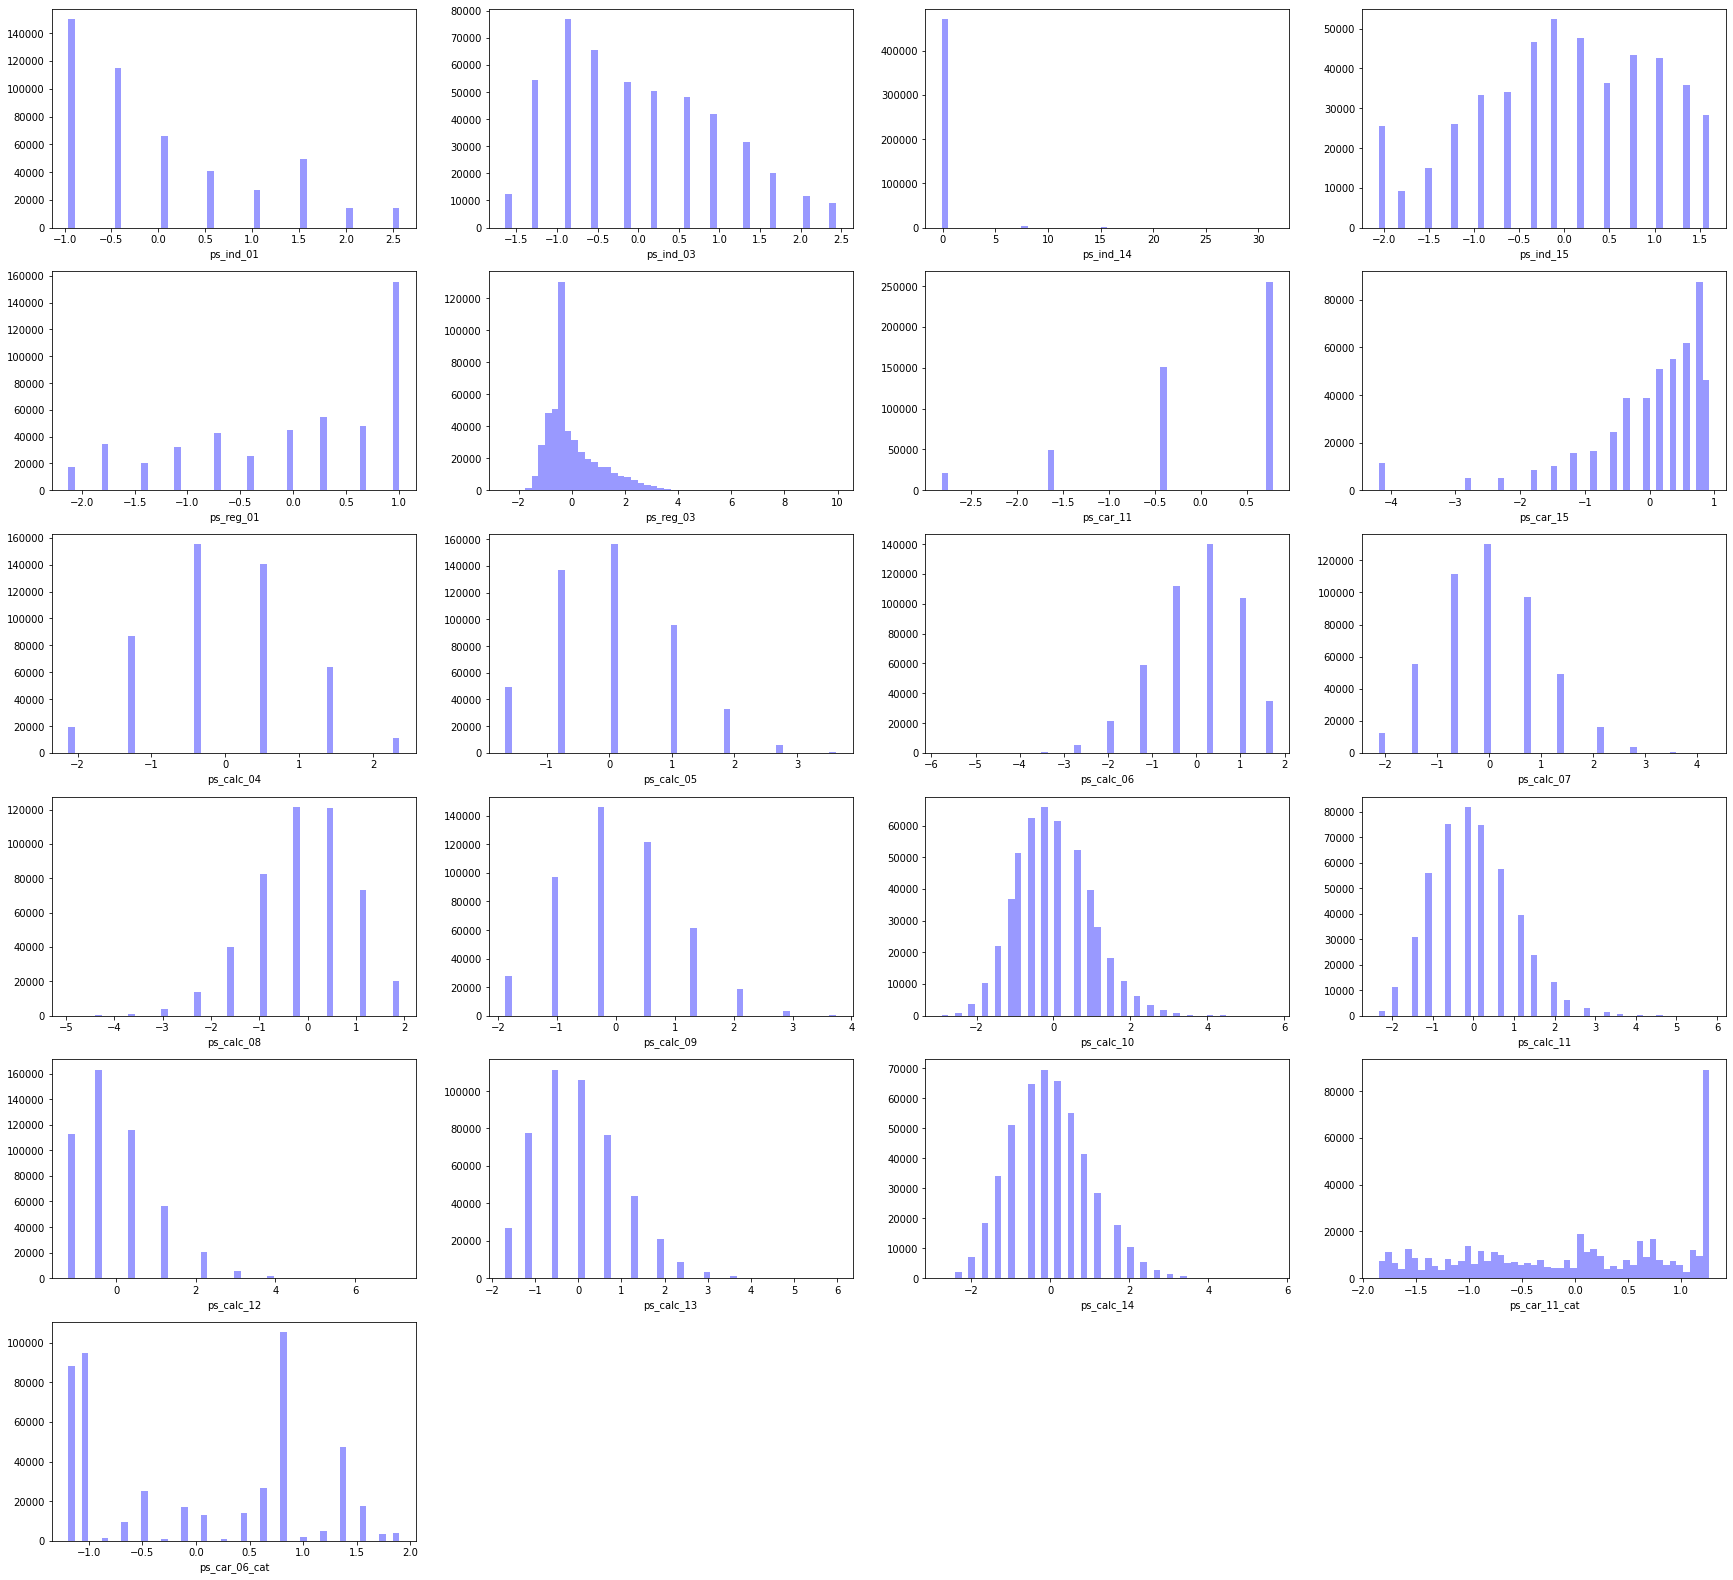

In [ ]:
#visualizing the distribution after scaling
n_row = len(features_std)
n_col = 4   
n_sub = 1      
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(bottom=-0.8,top=3)
for i in range(len(features_std)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(x_train[features_std[i]], kde=False, color='Blue')
    n_sub+=1   
plt.show()

**Principal Component Analysis**

As a next step in Dimensionality reduction, will apply Principal Component Analysis to reduce the features.

Will use .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [ ]:
from sklearn.decomposition import PCA

#make an instance of the model
pca = PCA(n_components=0.95)

#fit PCA on training data, and transform both training and test data later
pca.fit(x_train)

pca.n_components_

30

* We will have 30 features after applying PCA to maintain 95% variance.

In [ ]:
#apply PCA
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

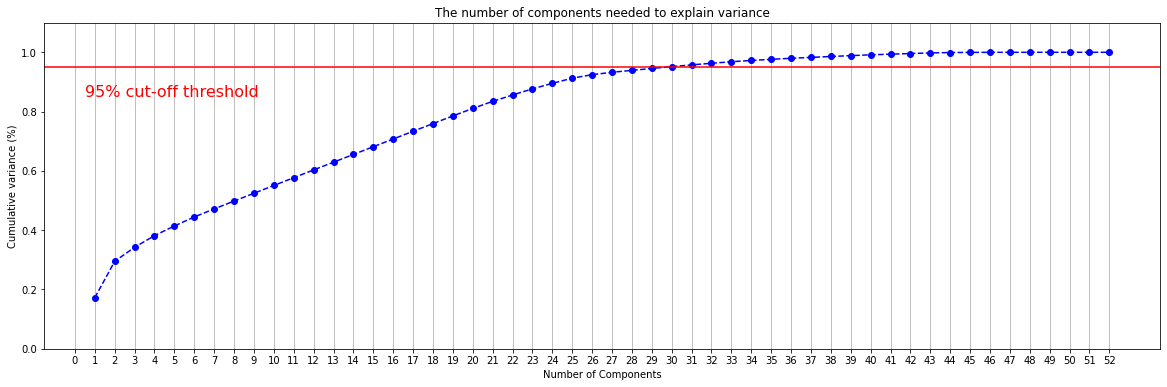

In [ ]:
#plot the variance to visualize best n_components for 95% variance
pca1 = PCA().fit(x_train)
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 53, step=1)
y = np.cumsum(pca1.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 53, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Logistic Regression Model

Let's build and train a simple Logistic Regression model and see the results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#define the model with default parameters
clf1 = LogisticRegression()

#fit the model
clf1.fit(x_train_pca, y_train)

#predict
y_pred_clf1 = clf1.predict(x_test_pca)

In [ ]:
#evaluate the model performance
print(classification_report(y_test, y_pred_clf1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


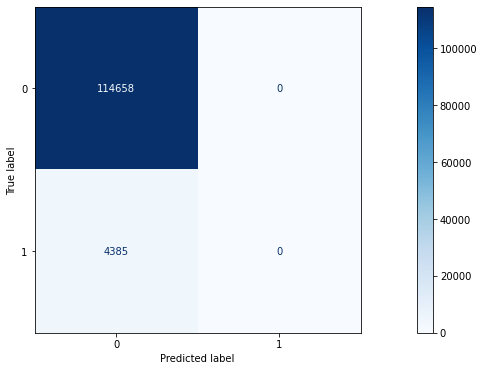

In [ ]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf1, x_test_pca, y_test, cmap='Blues', values_format='')

* We can see the model achieved an accuracy of 96%. However, the model can achieve this accuracy just by predicting everything '0' due to imbalanced data set.

* By looking at confusion matrix we can say that everything is predicted '0' which is of no use. Our model will fail to predict the claims and is of no use.

* The precision and f1_score for label '1' is '0.00' indicating the model is unable to predict any of the Claims. It just predicted everything as not-claimed.

* To overcome this issue, we need to balance the dataset.

# Dealing with imbalanced data

We will train our model with the transformed data. The transformations will use are random undersampling, random oversampling and SMOTE over sampling.

In [40]:
#checking records on 12% balance with under_sampling and over_sampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.12)
x_train_undersampled, y_train_undersampled = undersampler.fit_sample(x_train, y_train)
print("Training Records after 12% balance with under sampling:", x_train_undersampled.shape[0])

#over_sampling
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=0.12)
x_train_oversampled, y_train_oversampled = oversampler.fit_sample(x_train, y_train)
print("Training records after 12% balance with over sampling:", x_train_oversampled.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Records after 12% balance with under sampling: 161550
Training records after 12% balance with over sampling: 513923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=42, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') results:
training resampled shape (917720, 30)
value counts in each class (array([0, 1]), array([458860, 458860]))
              precision    recall  f1-score   support

           0       0.97      0.58      0.72    114658
           1       0.05      0.57      0.09      4385

    accuracy                           0.58    119043
   macro avg       0.51      0.57      0.41    119043
weighted avg       0.94      0.58      0.70    119043

---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto') results:
training resampled shape (917720, 30)
value counts in each class (array([0, 1]), array([458860, 458860]))
              precision    recall  f1-score   support

           0       0.97      0.60      0.74    114658
           1       0.05      0.56      0.09      4385

    accuracy                           0.60    119043
   macro avg       0.51      0.58      0.42    119043
weighted avg       0.94      0.60      0.72    119043

---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RandomUnderSampler(random_state=42, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto') results:
training resampled shape (34618, 30)
value counts in each class (array([0, 1]), array([17309, 17309]))
              precision    recall  f1-score   support

           0       0.97      0.60      0.74    114658
           1       0.05      0.56      0.09      4385

    accuracy                           0.60    119043
   macro avg       0.51      0.58      0.42    119043
weighted avg       0.94      0.60      0.72    119043



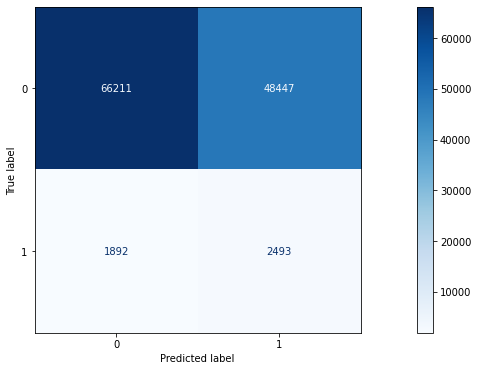

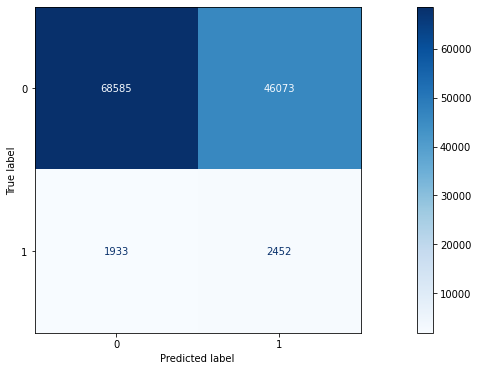

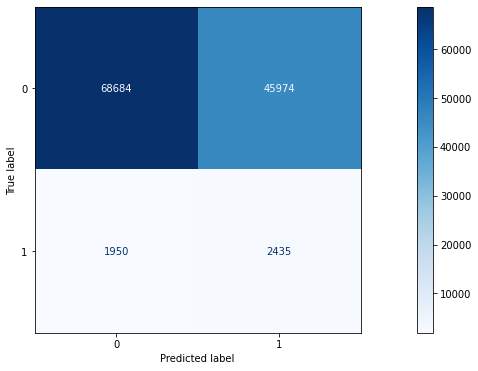

In [ ]:
#import libraries
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sm_methods = [SMOTE, RandomOverSampler, RandomUnderSampler]
clf2 = LogisticRegression(random_state=42)

for sm in sm_methods:
  print('---------------------------------------------')
  sm = sm(random_state=42)
  x_train_resampled, y_train_resampled = sm.fit_sample(x_train_pca, y_train)
  clf2.fit(x_train_resampled, y_train_resampled)
  y_pred = clf2.predict(x_test_pca)
  print(str(sm), 'results:')
  print('training resampled shape', x_train_resampled.shape)
  print('value counts in each class', np.unique(y_train_resampled, return_counts=True))
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(clf2, x_test_pca, y_test, cmap='Blues', values_format='')

* We can see improvement in model performance, the accuracy is realistic and our model is able to classify better compared to earlier model with imbalanced dataset.

* There is improvement in the f1_score as the model is able to classify some claims accurately.

* However, this performance is not up to the expectation, therefore, we can try with ensemble techniques.

# Ensemble Model - RandomForestClassifier

We build a model with RandomForestClassifier using default parameters and see the results.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

Execution Time: 14.776598723729451 mins


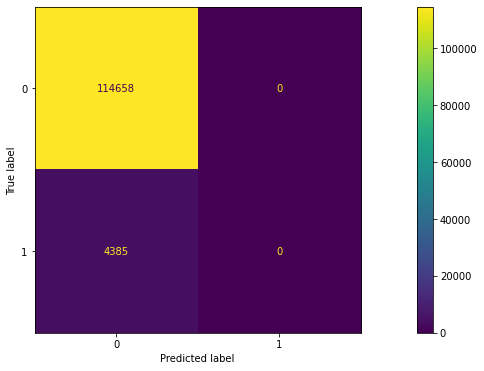

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from time import time

start = time()
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train_pca, y_train)
y_pred_rf = clf_rf.predict(x_test_pca)
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(clf_rf, x_test_pca, y_test, values_format='')
end = time()
print('Execution Time:', (end-start)/60, 'mins')

* Random forest classifier is not effective too on the imbalanced data. It gave the same results as simple Logistic Regression on imbalanced data.

* The execution time of RandomForestClassifier is higher when compared to LogisticRegression.

# RandomForestClassifier - Resampled Data

Will balance the data with SMOTE and use RandomForestClassifier

In [ ]:
#get the resampled dataset
sampler = SMOTE(random_state=42)
x_train_SMOTE, y_train_SMOTE = sampler.fit_sample(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#train the model with resampled data
clf_rf_SMOTE = RandomForestClassifier()
start = time()
clf_rf_SMOTE.fit(x_train_SMOTE, y_train_SMOTE)
end = time()
print("Execution Time:", (end-start)/60, 'mins')

Execution Time: 22.19690299431483 mins


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.07      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.52      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



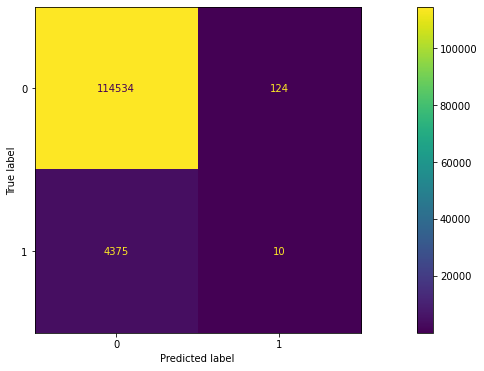

In [ ]:
#evaluate
y_pred_rf_SMOTE = clf_rf_SMOTE.predict(x_test_pca)
print(classification_report(y_test, y_pred_rf_SMOTE))
plot_confusion_matrix(clf_rf_SMOTE, x_test_pca, y_test, values_format='')

* We have better results from LogisticRegression compared to RandomForestClassifier.

# LinearSVC

Will use LinearSVC model with default parameters on imbalanced data and see the results.

In [ ]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC()
clf_svc.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



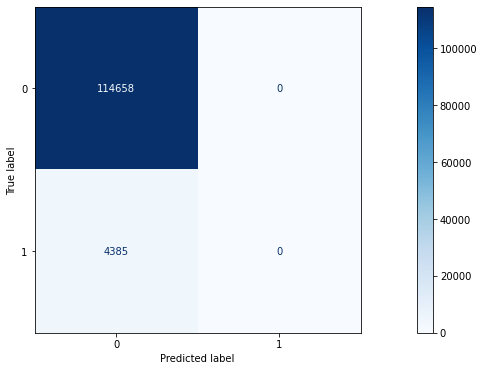

In [ ]:
#evaluate
y_pred_svc = clf_svc.predict(x_test_pca)
print(classification_report(y_test, y_pred_svc))
plot_confusion_matrix(clf_svc, x_test_pca, y_test, cmap='Blues', values_format='')

* We have same results on imbalanced data with LinearSVC as well. However, LinearSVC is faster than RandomForestClassifier.

# LinearSVC - Resampled Data

In [ ]:
#train the model with balanced dataset
clf_svc_SMOTE = LinearSVC(random_state=0)
clf_svc_SMOTE.fit(x_train_SMOTE, y_train_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

              precision    recall  f1-score   support

           0       0.97      0.58      0.72    114658
           1       0.05      0.57      0.09      4385

    accuracy                           0.58    119043
   macro avg       0.51      0.57      0.41    119043
weighted avg       0.94      0.58      0.70    119043



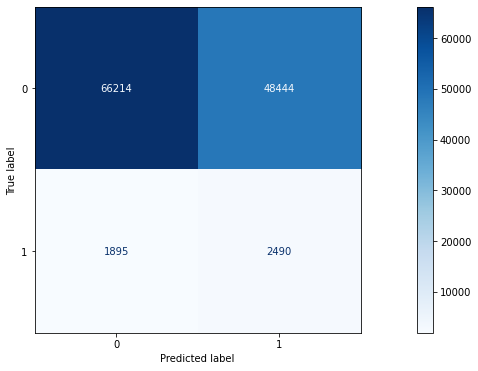

In [ ]:
#evaluate the model
y_pred_svc_SMOTE = clf_svc_SMOTE.predict(x_test_pca)
print(classification_report(y_test, y_pred_svc_SMOTE))
plot_confusion_matrix(clf_svc_SMOTE, x_test_pca, y_test, cmap='Blues', values_format='')

* We have similar results as of LogisticRegression. Let's tune the parameters for LinearSVC and see the results.

# LinearSVC - Hyperparameter Tuning

Let's check the model with different parameters and find the best LinearSVC model using cross validation. Considering the resources and time required for execution I will be using undersampling to balance the data.

In [ ]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import metrics

#balance the data with undersampler
samp = RandomUnderSampler(random_state=42)
x_train_usamp, y_train_usamp = samp.fit_sample(x_train_pca, y_train)

#define a set of parameters
params = {"dual": [True, False], "C":[0.5, 1.5], "max_iter":[100, 500]}

#define scorer based on f1_score
f1_scorer = make_scorer(metrics.f1_score, average='weighted', labels=[0, 1])



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#define and fit GridSearchCV
gs = GridSearchCV(LinearSVC(), param_grid=params, scoring=f1_scorer, n_jobs=-1)
gs.fit(x_train_usamp, y_train_usamp)

print("Best Parameters:", gs.best_params_)
print("Best Estimator:", gs.best_estimator_)
print("Best Score:", gs.best_score_)

Best Parameters: {'C': 0.5, 'dual': False, 'max_iter': 100}
Best Estimator: LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best Score: 0.5747719817976698


              precision    recall  f1-score   support

           0       0.97      0.60      0.74    114658
           1       0.05      0.55      0.09      4385

    accuracy                           0.60    119043
   macro avg       0.51      0.58      0.42    119043
weighted avg       0.94      0.60      0.72    119043



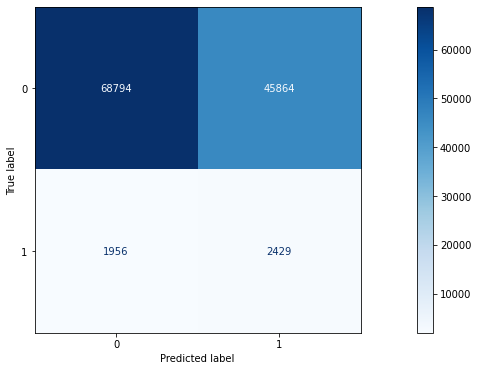

In [ ]:
#evaluating with the best parameters
clf_svc_best = gs.best_estimator_
y_pred_svc_best = clf_svc_best.predict(x_test_pca)
print(classification_report(y_test, y_pred_svc_best))
plot_confusion_matrix(clf_svc_best, x_test_pca, y_test, cmap='Blues', values_format='')

* We still have the similar performance. There is small improvement in the weighted avg of f1_score.

In [ ]:
#training the model only with 100K records
clf_svc_slice = LinearSVC(random_state=0, dual=False, C=0.5, max_iter=100)
clf_svc_slice.fit(x_train_SMOTE[:100000], y_train_SMOTE[:100000])

LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



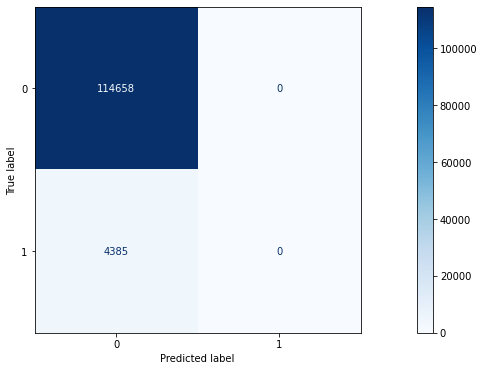

In [ ]:
#evaluate
y_pred_svc_slice = clf_svc_slice.predict(x_test_pca)
print(classification_report(y_test, y_pred_svc_slice))
plot_confusion_matrix(clf_svc_slice, x_test_pca, y_test, cmap='Blues', values_format='')

* We see the performance dropped by using 100K records for training.

# XGBoost Classifier

Will use the XGBoost Classifier with default parameters on the imbalanced data first and check the performance.

In [ ]:
#import libraries
import xgboost as xgb
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114658
           1       0.00      0.00      0.00      4385

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



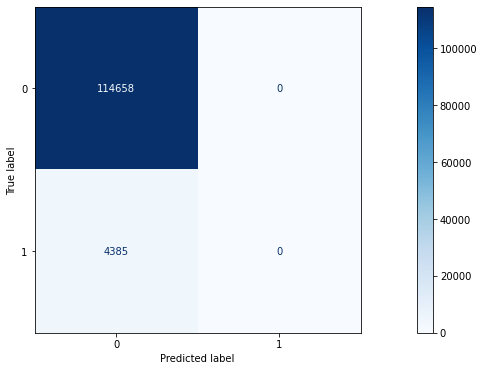

In [ ]:
#define and train the model
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train_pca, y_train)
y_pred_xgb = clf_xgb.predict(x_test_pca)
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(clf_xgb, x_test_pca, y_test, cmap='Blues', values_format='')

* We can see XGBClassifier is also affected by the imbalanced data.

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    114658
           1       0.06      0.04      0.05      4385

    accuracy                           0.94    119043
   macro avg       0.51      0.51      0.51    119043
weighted avg       0.93      0.94      0.94    119043



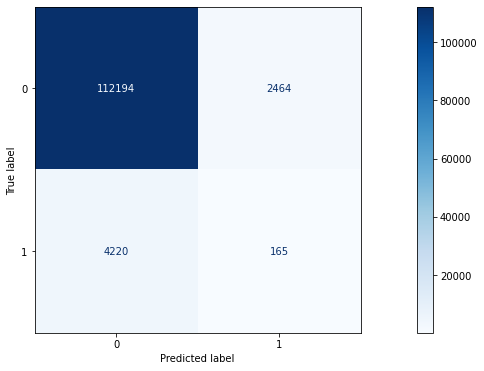

In [ ]:
#XGBClassifier with resampled data
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train_SMOTE, y_train_SMOTE)
y_pred_xgb = clf_xgb.predict(x_test_pca)
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(clf_xgb, x_test_pca, y_test, cmap='Blues', values_format='')

* There is no improvement with XGBClassifier as well. 

# Neural Network - MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(hidden_layer_sizes=(150, 150, 150), learning_rate='adaptive', random_state=42)

In [ ]:
#training the model on imbalanced data
clf_mlp.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150, 150), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    114658
           1       0.06      0.01      0.02      4385

    accuracy                           0.96    119043
   macro avg       0.51      0.50      0.50    119043
weighted avg       0.93      0.96      0.94    119043



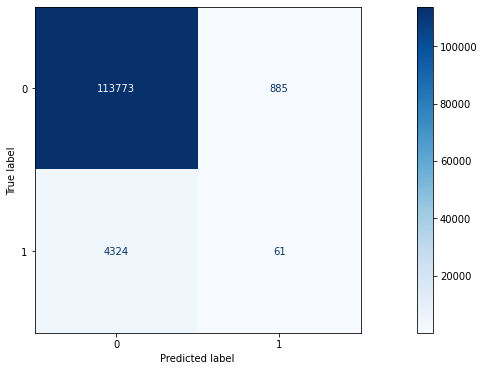

In [ ]:
#evaluate the model
y_pred_mlp = clf_mlp.predict(x_test_pca)
print(classification_report(y_test, y_pred_mlp))
plot_confusion_matrix(clf_mlp, x_test_pca, y_test, cmap='Blues', values_format='')

* MLPClassifier performed better on imbalanced data compared to the other classifiers we used so far.

* We can see better f1_score, whereas all other models had 0 score on imbalanced data.

              precision    recall  f1-score   support

           0       0.97      0.53      0.68    114658
           1       0.04      0.53      0.08      4385

    accuracy                           0.53    119043
   macro avg       0.50      0.53      0.38    119043
weighted avg       0.93      0.53      0.66    119043



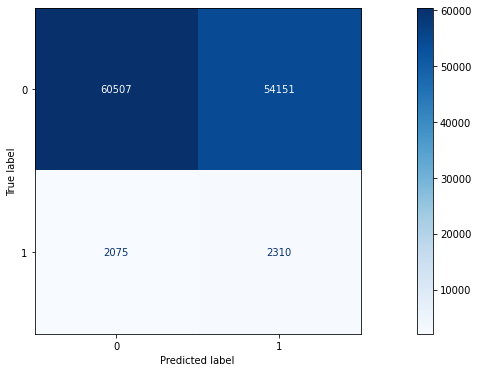

In [ ]:
#will train the MLPClassifier with balanced data to see if we get improved results. I will be using undersampled data considering the resources and execution time.
clf_mlp_usamp = MLPClassifier(hidden_layer_sizes=(150, 150, 150), learning_rate='adaptive', random_state=42)
clf_mlp_usamp.fit(x_train_usamp, y_train_usamp)

#evaluate the model
y_pred_mlp_usamp = clf_mlp_usamp.predict(x_test_pca)
print(classification_report(y_test, y_pred_mlp_usamp))
plot_confusion_matrix(clf_mlp_usamp, x_test_pca, y_test, cmap='Blues', values_format='')


* The accuracy score is realsitic, however, we would need better accuracy.

In [ ]:
#will do a GridSearchCV with different layer sizes
#define a set of parameters
params = {'hidden_layer_sizes':[(61), (61,31), (61,31,15)]}

#define scorer based on f1_score
f1_scorer = make_scorer(metrics.f1_score, average='weighted', labels=[0, 1])

gs = GridSearchCV(MLPClassifier(), param_grid=params, scoring=f1_scorer, n_jobs=-1)
gs.fit(x_train_usamp, y_train_usamp)

print("Best Parameters:", gs.best_params_)
print("Best Estimator:", gs.best_estimator_)
print("Best Score:", gs.best_score_)

Best Parameters: {'hidden_layer_sizes': 61}
Best Estimator: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=61, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Best Score: 0.5530383821809394


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


* Cross validation indicates single hidden layer has better performance.

              precision    recall  f1-score   support

           0       0.97      0.58      0.73    114658
           1       0.05      0.53      0.09      4385

    accuracy                           0.58    119043
   macro avg       0.51      0.56      0.41    119043
weighted avg       0.94      0.58      0.71    119043



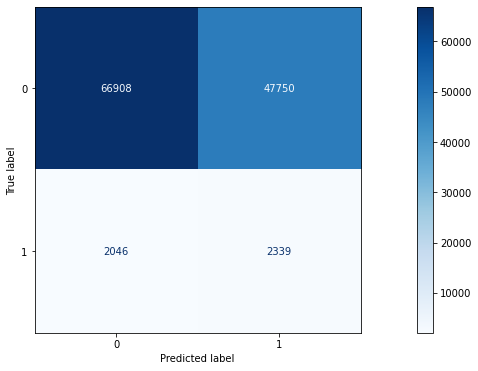

In [ ]:
clf_mlp_best = gs.best_estimator_
clf_mlp_best.fit(x_train_usamp, y_train_usamp)

#evaluate the model
y_pred_mlp_best = clf_mlp_best.predict(x_test_pca)
print(classification_report(y_test, y_pred_mlp_best))
plot_confusion_matrix(clf_mlp_best, x_test_pca, y_test, cmap='Blues', values_format='')

# One-hot Encoding

So far, I have not encoded the categorical variables as they are already in int/float format. To see if we can get improved model, I will now use the scaled data with one-hot encoded categorical features.

In [17]:
#prepare x and y from previous analysis
x_new = df_mvt.drop(['id', 'target'], axis=1)

y_new = df_mvt['target']

print(x.shape, y.shape)

(595212, 55) (595212,)


In [18]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
print(x_train_new.shape, x_test_new.shape, y_train_new.shape, y_test_new.shape)

(476169, 55) (119043, 55) (476169,) (119043,)


In [19]:
#dropping features based on our analysis earlier
x_train_new = x_train_new.drop(['ps_reg_02', 'ps_car_12', 'ps_car_13'], axis=1)
x_test_new = x_test_new.drop(['ps_reg_02', 'ps_car_12', 'ps_car_13'], axis=1)
print(x_train_new.shape, x_test_new.shape)

(476169, 52) (119043, 52)


In [20]:
x_train_new.reset_index(drop=True, inplace=True)
x_test_new.reset_index(drop=True, inplace=True)
x_train_new.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,1,5,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0.9,0.728011,7,1,0,14,1,1,2,1,42,2,0.393700,3.316625,0.8,0.8,0.6,3,3,8,3,10,3,8,4,4,3,11,0,0,1,0,1,0
1,0,1,7,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.0,0.837780,11,0,0,1,1,0,2,1,51,2,0.436348,3.741657,0.8,0.6,0.6,1,2,6,4,11,4,18,8,1,3,6,0,1,0,1,0,0
2,0,1,3,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.3,0.720677,11,1,0,9,1,1,2,1,21,3,0.313050,3.605551,0.0,0.1,0.9,0,1,9,6,10,3,11,5,2,3,10,0,0,0,0,0,0
3,0,3,4,0,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.9,0.692369,5,1,0,11,0,1,2,1,103,3,0.288791,3.605551,0.9,0.5,0.6,3,0,7,2,9,3,13,2,3,1,10,0,1,0,0,0,0
4,0,1,2,1,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.4,0.427931,7,1,0,11,1,1,0,1,11,2,0.368782,3.605551,0.2,0.8,0.9,4,1,6,3,8,2,11,8,3,6,11,0,0,0,0,1,1


In [27]:
#scaling numerical features, will use minmaxscaler this time
x_features = x_train.columns.tolist()
#finding the numerical features by excluding categorical and binary features
num_features = [n for n in x_features if ('cat' not in n and 'bin' not in n )]
print('No of Numerical Features:', len(num_features))
print(num_features)

No of Numerical Features: 23
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_03', 'ps_car_11', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [23]:
#applying MinMaxScaler by fitting on training set and transform on training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_new[num_features])
x_train_scaled = pd.DataFrame(scaler.transform(x_train_new[num_features]), columns=num_features)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_new[num_features]), columns=num_features)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(476169, 23)
(119043, 23)


In [24]:
#replacing the features in x with scaled data
x_train_new = x_train_new.drop(num_features, axis=1)
x_train_new = x_train_new.join(x_train_scaled)

x_test_new = x_test_new.drop(num_features, axis=1)
x_test_new = x_test_new.join(x_test_scaled)

print(x_train_new.shape, x_test_new.shape)

x_train_new.head()

(476169, 52) (119043, 52)


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,7,1,0,14,1,1,2,1,42,0,0,1,0,1,0,0.285714,0.454545,0.0,0.153846,1.000000,0.167670,0.666667,0.539347,0.886405,0.888889,0.888889,0.666667,0.6,0.500000,0.8,0.333333,0.8,0.428571,0.32,0.210526,0.4,0.230769,0.478261
1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,11,0,0,1,1,0,2,1,51,0,1,0,1,0,0,0.000000,0.636364,0.0,0.615385,0.000000,0.195273,0.666667,0.620296,1.000000,0.888889,0.666667,0.666667,0.2,0.333333,0.6,0.444444,0.9,0.571429,0.72,0.421053,0.1,0.230769,0.260870
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,11,1,0,9,1,1,2,1,21,0,0,0,0,0,0,0.000000,0.272727,0.0,0.615385,0.333333,0.165825,1.000000,0.386266,0.963624,0.000000,0.111111,1.000000,0.0,0.166667,0.9,0.666667,0.8,0.428571,0.44,0.263158,0.2,0.230769,0.434783
3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,5,1,0,11,0,1,2,1,103,0,1,0,0,0,0,0.000000,0.363636,0.0,0.846154,1.000000,0.158707,1.000000,0.340221,0.963624,1.000000,0.555556,0.666667,0.6,0.000000,0.7,0.222222,0.7,0.428571,0.52,0.105263,0.3,0.076923,0.434783
4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,7,1,0,11,1,1,0,1,11,0,0,0,0,1,1,0.000000,0.181818,0.0,0.769231,0.444444,0.092210,0.666667,0.492050,0.963624,0.222222,0.888889,1.000000,0.8,0.166667,0.6,0.333333,0.6,0.285714,0.44,0.421053,0.3,0.461538,0.478261


In [26]:
#listing out the categorical features
cat_features = [c for c in x_features if ('cat' in c)]
print('No of Numerical Features:', len(num_features))
print(cat_features)

No of Numerical Features: 23
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [28]:
#onehot encoding the categorical features
import pandas as pd
x_train_new = pd.get_dummies(x_train_new, columns=cat_features, drop_first=True)
print('After dummification we have {} variables in train'.format(x_train_new.shape[1]))

After dummification we have 199 variables in train


In [29]:
x_train_new.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_03,ps_car_11,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,...,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0.285714,0.454545,0.0,0.153846,1.000000,0.167670,0.666667,0.539347,0.886405,0.888889,0.888889,0.666667,0.6,0.500000,0.8,0.333333,0.8,0.428571,0.32,0.210526,0.4,0.230769,0.478261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0.000000,0.636364,0.0,0.615385,0.000000,0.195273,0.666667,0.620296,1.000000,0.888889,0.666667,0.666667,0.2,0.333333,0.6,0.444444,0.9,0.571429,0.72,0.421053,0.1,0.230769,0.260870,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.000000,0.272727,0.0,0.615385,0.333333,0.165825,1.000000,0.386266,0.963624,0.000000,0.111111,1.000000,0.0,0.166667,0.9,0.666667,0.8,0.428571,0.44,0.263158,0.2,0.230769,0.434783,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.000000,0.363636,0.0,0.846154,1.000000,0.158707,1.000000,0.340221,0.963624,1.000000,0.555556,0.666667,0.6,0.000000,0.7,0.222222,0.7,0.428571,0.52,0.105263,0.3,0.076923,0.434783,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.000000,0.181818,0.0,0.769231,0.444444,0.092210,0.666667,0.492050,0.963624,0.222222,0.888889,1.000000,0.8,0.166667,0.6,0.333333,0.6,0.285714,0.44,0.421053,0.3,0.461538,0.478261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
x_test_new = pd.get_dummies(x_test_new, columns=cat_features, drop_first=True)
print('After dummification we have {} variables in train'.format(x_test_new.shape[1]))

After dummification we have 199 variables in train


# MLP Classifier - OneHotEncoded Data

Will train MLP classifier on OneHotEncoded imbalanced dataset

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf_mlp_new = MLPClassifier(hidden_layer_sizes=(200), random_state=42)

In [ ]:
#train the model and evaluate
clf_mlp_new.fit(x_train_new, y_train_new)

#evaluate the model
y_pred_mlp_new = clf_mlp_new.predict(x_test_new)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    114658
           1       0.07      0.01      0.02      4385

    accuracy                           0.96    119043
   macro avg       0.52      0.50      0.50    119043
weighted avg       0.93      0.96      0.94    119043



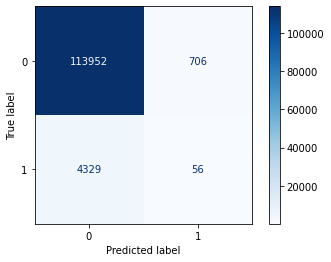

In [34]:
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test_new, y_pred_mlp_new))
plot_confusion_matrix(clf_mlp_new, x_test_new, y_test_new, cmap='Blues', values_format='')

In [35]:
#balance the data with undersampler
from imblearn.under_sampling import RandomUnderSampler
samp_new = RandomUnderSampler(random_state=42)
x_train_usamp_new, y_train_usamp_new = samp_new.fit_sample(x_train_new, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.97      0.54      0.69    114658
           1       0.04      0.54      0.08      4385

    accuracy                           0.54    119043
   macro avg       0.51      0.54      0.38    119043
weighted avg       0.93      0.54      0.67    119043



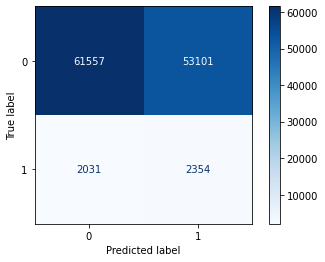

In [36]:
#will apply the MLPClassifier on balanced data
clf_mlp_usamp_new = MLPClassifier(hidden_layer_sizes=(200), random_state=42)
clf_mlp_usamp_new.fit(x_train_usamp_new, y_train_usamp_new)

#evaluate the model
y_pred_mlp_usamp_new = clf_mlp_usamp_new.predict(x_test_new)
print(classification_report(y_test_new, y_pred_mlp_usamp_new))
plot_confusion_matrix(clf_mlp_usamp_new, x_test_new, y_test_new, cmap='Blues', values_format='')

# Challenges

There were many challenges in this problem which were mainly from the data while some from the algorithms.

* The imbalance of the dataset was challenging. Learning how to do resampling, and why we should or should not do the resampling was a challenge. And the resampling techniques have their own drawbacks.

* Dealing with cross-validation and the problem of data leakage after resampling was challenging.

* The limitation of the classifiers in terms of speed was challenging.

* Feature engineering was very hard, because we do not know the real names of features and we can not have intuition on them.